# **Import Libraries**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [88]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/insurance.csv")

In [89]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Exploratory Data Analysis**

Text(0.5, 1.0, 'Distribution of Charges')

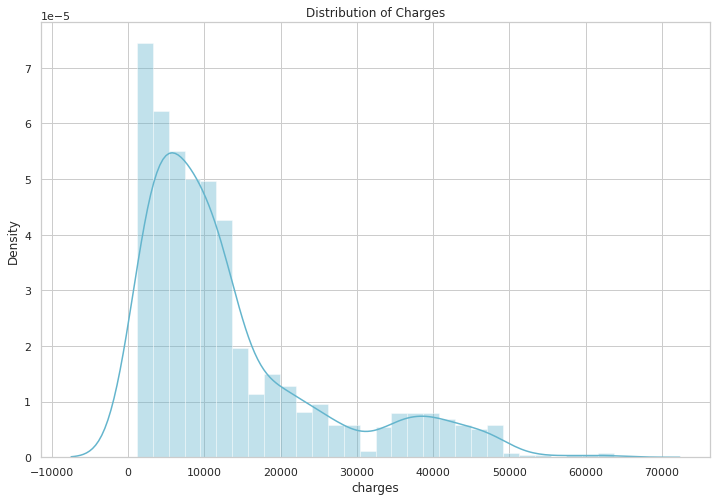

In [93]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

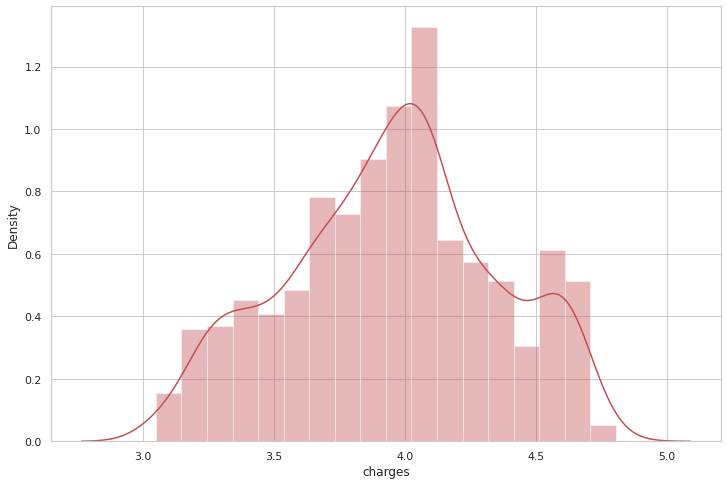

In [94]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


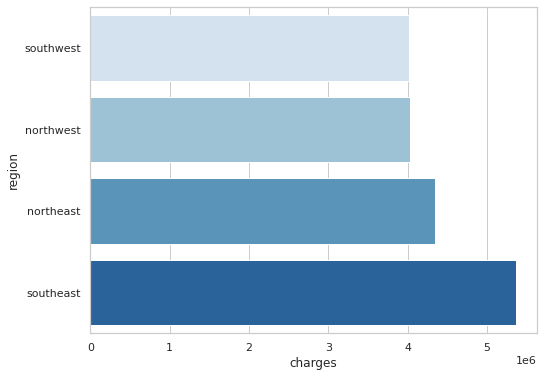

In [95]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

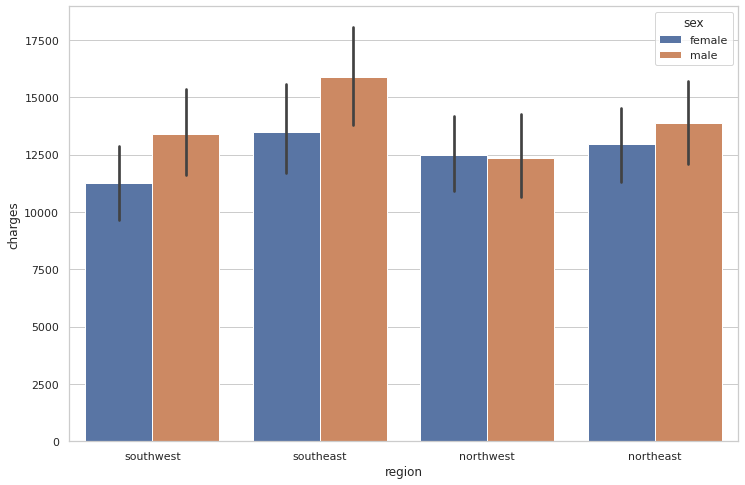

In [96]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df)

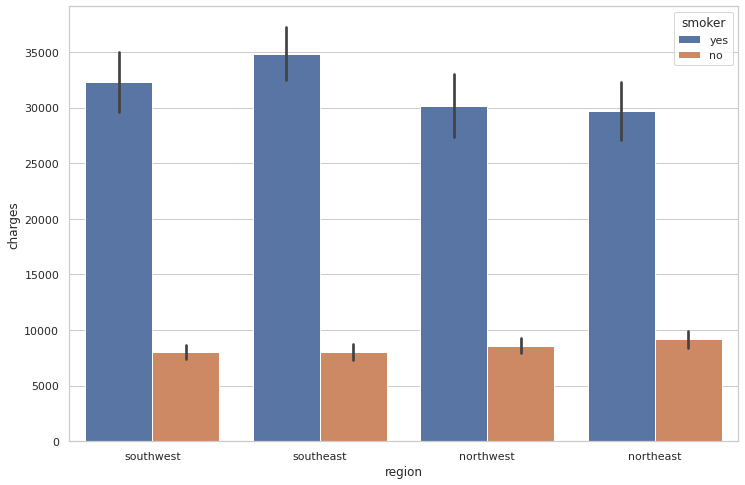

In [97]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df)

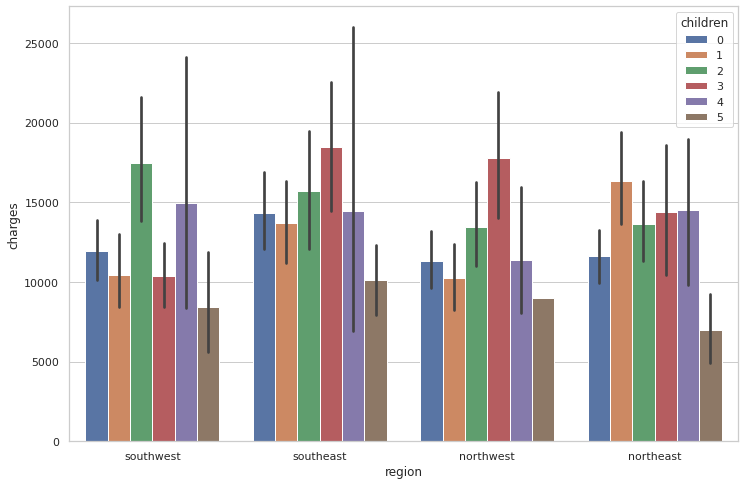

In [98]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df)

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

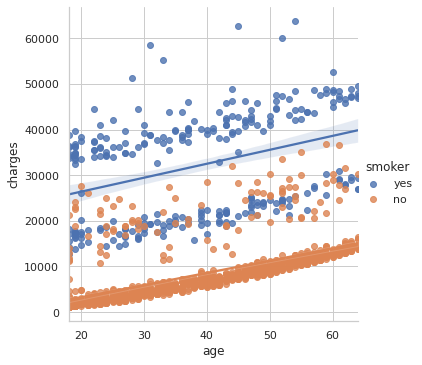

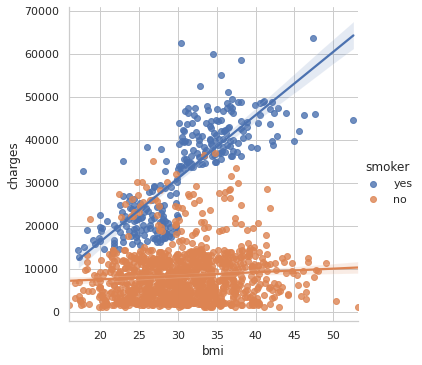

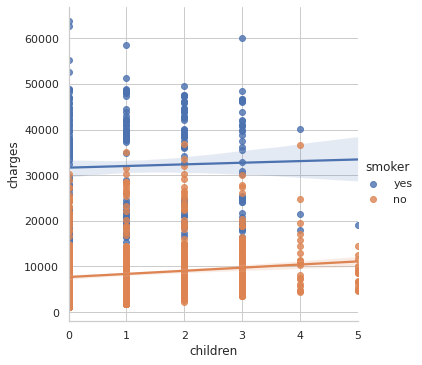

In [99]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

# **Data Preprocessing**

In [100]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [101]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

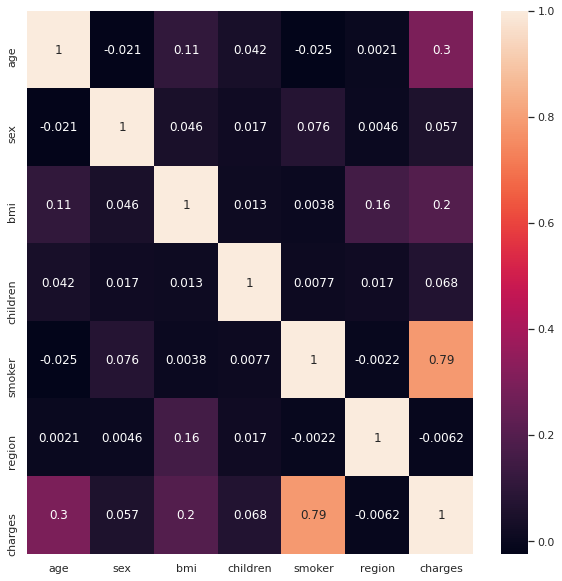

In [102]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True)

No correlation, except with the smoking

# **Linear Regression**

In [103]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824413
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


# **Ridge Regression**

In [104]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495822
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


# **Lasso Regression**

In [105]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


# **RandomForest Regressor**

In [106]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3630549.354, MSE test data: 19737210.132
R2 train data: 0.971, R2 test data: 0.877


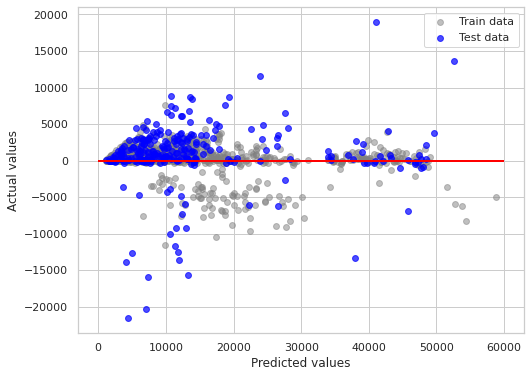

In [107]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218751)
3.age(0.136942)
4.children(0.021042)
5.region(0.015209)
6.sex(0.006377)


<BarContainer object of 6 artists>

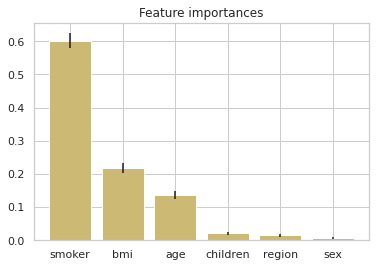

In [108]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

# **Polynomial Regression**

In [109]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252914
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345225


In [110]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776467
Mean Squared Error: 18895160.098780435
Root Mean Squared Error: 4346.85634669245


# **Prediction**

In [111]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head()

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727


### **Conclusion** 
like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model